
**Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.**

Ans Boosting is an ensemble learning technique that combines several weak learners (models that perform slightly better than random guessing) to form a strong and accurate model.
It works sequentially, where each new learner is trained to correct the errors made by the previous ones.


**How Boosting improves weak learners**

1. Assigns weights to data points – Initially equal, but increased for misclassified samples.


2. Focuses on difficult cases – Each new learner pays more attention to the samples the previous learners got wrong.


3. Reduces bias – By correcting errors step-by-step, boosting creates a model with much lower bias.


4. Combines learners using weighted voting/averaging – Better learners get higher weight, improving final accuracy



**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?**

Ans Difference Between AdaBoost and Gradient Boosting (Training Process)

**1. How Errors Are Handled**

AdaBoost

1. Focuses on misclassified samples.

2. In each round, it increases the weights of misclassified instances.

3. The next weak learner tries harder to correct previous classification mistakes.

Gradient Boosting

1. Focuses on residual errors (gradients).

2. Each new weak learner is trained to predict the residuals (i.e., the difference between actual value and current model prediction).

3. Works by performing gradient descent on a loss function.


**2. How Weak Learners Are Combined**

AdaBoost

1. Combines learners using weighted majority vote (classification) or weighted sum.

Gradient Boosting

1. Combines learners by adding the predictions of weak models step-by-step.

2. Each model contributes a small step controlled by learning rate.


**3. Type of Error Correction**

AdaBoost

1. Corrects errors by reweighting samples.

2. Directly focuses on hard cases.


Gradient Boosting


1. Corrects errors by fitting to the gradient/residual.

2. Uses loss function optimization.

**Question 3: How does regularization help in XGBoost?**

Ans Regularization in XGBoost (L1 and L2) helps by controlling model complexity, penalizing large leaf weights, and reducing overfitting.

It ensures the trees are simpler, more generalizable, and prevents the model from fitting noise.
Thus, regularization makes XGBoost more robust and improves generalization performance.

**Question 4: Why is CatBoost considered efficient for handling categorical data?**

Ans CatBoost is efficient for categorical data because it automatically handles categorical features using Target Encoding with Ordered Statistics, which prevents target leakage.

It also uses efficient encoding techniques (like ordered boosting) that avoid overfitting and do not require manual one-hot encoding.

Thus, CatBoost delivers fast, accurate, and leakage-free performance on datasets with many categorical variables.

**Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

Ans Boosting is preferred when you need high accuracy on complex patterns and can afford sequential learning.

Common applications:

**Fraud Detection**

Boosting models (like XGBoost, LightGBM) catch subtle, rare fraud patterns better than bagging.

**Credit Scoring & Risk Modeling**

Works well because boosting focuses on hard-to-predict cases.

**Customer Churn Prediction**

Boosting captures nonlinear interactions and small signals.

**Medical Diagnosis / Disease Prediction**

High precision matters, and boosting improves on weak learners.

**Click-Through Rate (CTR) Prediction & Ads Ranking**

Used heavily in online advertising because boosting handles large, messy datasets well.

**Search Ranking & Recommendation Systems**

Gradient boosting models are widely used for ranking tasks.


In [1]:
'''Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy'''



# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train AdaBoost Classifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# 6. Print accuracy
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9649122807017544


In [2]:
'''Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score'''


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.7756446042829697


In [4]:
'''Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy'''


# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create XGBoost Classifier (updated)
xgb = XGBClassifier(eval_metric='logloss')

# Define parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Apply GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Train the model
grid.fit(X_train, y_train)

# Make predictions
y_pred = grid.predict(X_test)

# Print best parameters and accuracy
print("Best Learning Rate:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Learning Rate: {'learning_rate': 0.2}
Accuracy: 0.956140350877193


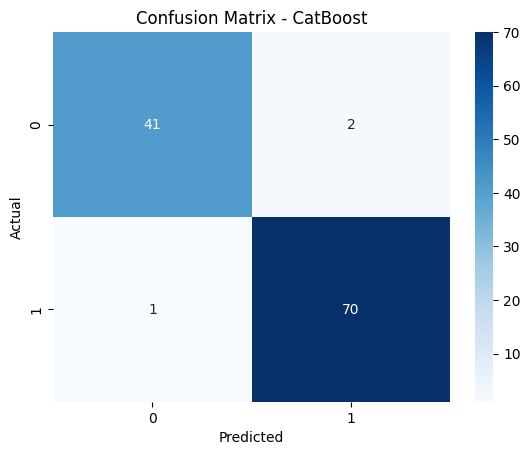

Accuracy: 0.9736842105263158


In [9]:
'''Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn'''

# Install CatBoost
!pip install catboost

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
'''Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model'''


# Ans 1. Data Preprocessing

# Handle missing values using mean/median for numeric features and mode or “Missing” category for categorical features.

# Encode categorical variables using Label Encoding / One-Hot Encoding (or let CatBoost handle them automatically).

# Perform feature scaling if required and remove outliers.

# 2. Handling Class Imbalance

# Use class weights or oversampling techniques (SMOTE) to balance the dataset.

# 3. Choice of Boosting Algorithm

# AdaBoost – Simple but less powerful for complex, large datasets.

# XGBoost – Fast, handles missing values well, highly accurate.

# CatBoost – Best for datasets with categorical features and missing values because it handles them internally.
# Preferred choice: CatBoost or XGBoost

# 4. Hyperparameter Tuning

# Use GridSearchCV or RandomizedSearchCV to tune parameters like:

# learning rate

# number of trees

# tree depth

# Use cross-validation to avoid overfitting.

# 5. Evaluation Metrics (for Imbalanced Data)

# Precision – correctness of predicted defaulters

# Recall – ability to detect actual defaulters

# F1-score – balance between precision and recall

# ROC-AUC – overall model performance
# (Accuracy is avoided because data is imbalanced.)

# 6. Business Benefits

# Reduces loan default risk

# Helps prioritize high-risk customers

# Improves profitability and decision-making

# Enables better credit approval strategies